In [1]:
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 26.80 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import os


In [3]:
import os 

main_dir = "/content/datasets/Data"

train_dir = os.path.join(main_dir, 'train')

test_dir = os.path.join(main_dir, 'test')

train_covid_dir = os.path.join(train_dir, 'COVID19')

train_normal_dir = os.path.join(train_dir, 'NORMAL')

test_covid_dir = os.path.join(test_dir, 'COVID19')

test_normal_dir = os.path.join(test_dir, 'NORMAL')


In [4]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:4])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:4])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:4])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:4])

['COVID19(567).jpg', 'COVID19(407).jpg', 'COVID-19 (4).jpeg', 'COVID19(477).jpg']
['NORMAL(1444).jpg', 'NORMAL(1398).jpg', 'NORMAL(497).jpg', 'NORMAL(463).jpg']
['COVID19(164).jpg', 'COVID19(526).jpg', 'COVID-19 (878).jpg', 'COVID19(346).jpg']
['NORMAL(974).jpg', 'NORMAL(1371).jpg', 'NORMAL(237).jpg', 'NORMAL(1283).jpg']


In [5]:
print("Total images present in the training set: ", len(train_covid_names+train_normal_names))
print("Total images present in the test set: ", len(test_covid_names+test_normal_names))

Total images present in the training set:  1811
Total images present in the test set:  484


/content/datasets/Data/train/COVID19/COVID19(567).jpg
/content/datasets/Data/train/COVID19/COVID19(407).jpg
/content/datasets/Data/train/COVID19/COVID-19 (4).jpeg
/content/datasets/Data/train/COVID19/COVID19(477).jpg
/content/datasets/Data/train/COVID19/COVID-19 (269).jpg
/content/datasets/Data/train/COVID19/COVID19(300).jpg
/content/datasets/Data/train/COVID19/COVID-19 (174).jpg
/content/datasets/Data/train/COVID19/COVID19(360).jpg
/content/datasets/Data/train/NORMAL/NORMAL(1444).jpg
/content/datasets/Data/train/NORMAL/NORMAL(1398).jpg
/content/datasets/Data/train/NORMAL/NORMAL(497).jpg
/content/datasets/Data/train/NORMAL/NORMAL(463).jpg
/content/datasets/Data/train/NORMAL/NORMAL(927).jpg
/content/datasets/Data/train/NORMAL/NORMAL(1277).jpg
/content/datasets/Data/train/NORMAL/NORMAL(414).jpg
/content/datasets/Data/train/NORMAL/NORMAL(1389).jpg


<function matplotlib.pyplot.show>

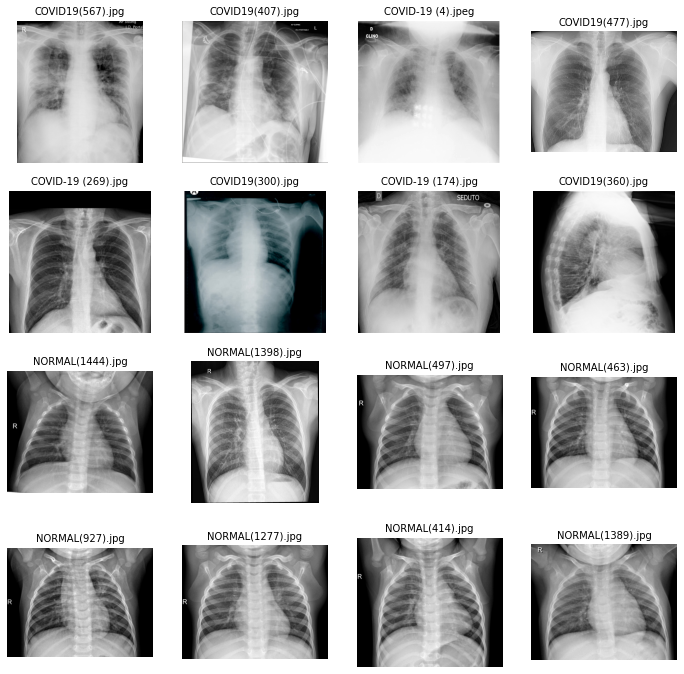

In [7]:
import matplotlib.image as mpimg

rows = 4
cols = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

covid_pic = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_pic = [os.path.join(train_normal_dir, filename)for filename in train_normal_names[0:8]]

merged_list = covid_pic+normal_pic
for i, img_path in enumerate(merged_list):
    data = img_path.split('/', 6)[6]
    print(img_path)
    sp = plt.subplot(rows, cols, i+1)
    sp.axis('off')
    img = mpimg.imread(img_path)
    sp.set_title(data, fontsize=10)
    plt.imshow(img, cmap='gray')

plt.show


In [11]:
# generate training, testing and validation batches 

data_generate_train = ImageDataGenerator(rescale=1./255,
                                         validation_split=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip=True)
data_generate_validation = ImageDataGenerator(rescale=1./255)
data_generate_test = ImageDataGenerator(rescale=1./255)

train_generator = data_generate_train.flow_from_directory(train_dir,
                                                          target_size=(150,150),
                                                          subset='training',
                                                          batch_size=32,
                                                          class_mode='binary')
validation_generator = data_generate_train.flow_from_directory(train_dir,
                                                          target_size=(150,150),
                                                          subset='validation',
                                                          batch_size=32,
                                                          class_mode='binary')
test_generator = data_generate_test.flow_from_directory(test_dir,
                                                          target_size=(150,150),
                                                          batch_size=32,
                                                          class_mode='binary')

# class indices
print(train_generator.class_indices)

#image shape
print(train_generator.image_shape)


Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.
{'COVID19': 0, 'NORMAL': 1}


(150, 150, 3)

In [12]:
model = Sequential()

model.add(Conv2D(32,(5,5), padding='SAME', activation='relu', input_shape=(150,150,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(64,(5,5), padding='SAME', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [13]:
model.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
trained_model = model.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30
46/46 [==============================] - 85s 1s/step - loss: 2.0831 - accuracy: 0.6652 - val_loss: 0.3935 - val_accuracy: 0.9033
Epoch 2/30
46/46 [==============================] - 54s 1s/step - loss: 0.2228 - accuracy: 0.9199 - val_loss: 0.1905 - val_accuracy: 0.9530
Epoch 3/30
46/46 [==============================] - 55s 1s/step - loss: 0.1573 - accuracy: 0.9474 - val_loss: 0.3129 - val_accuracy: 0.9282
Epoch 4/30
46/46 [==============================] - 55s 1s/step - loss: 0.1796 - accuracy: 0.9403 - val_loss: 0.1388 - val_accuracy: 0.9586
Epoch 5/30
46/46 [==============================] - 54s 1s/step - loss: 0.1662 - accuracy: 0.9474 - val_loss: 0.1355 - val_accuracy: 0.9558
Epoch 6/30
46/46 [==============================] - 53s 1s/step - loss: 0.1576 - accuracy: 0.9445 - val_loss: 0.1090 - val_accuracy: 0.9669
Epoch 7/30
46/46 [==============================] - 53s 1s/step - loss: 0.1319 - accuracy: 0.9555 - val_loss: 0.2122 - val_accuracy: 0.9337
Epoch 8/30
46/46 [==

Text(0.5, 0, 'Epochs')

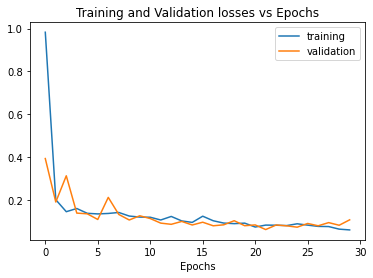

In [15]:
# get keys of trained model
trained_model.history.keys

# plot training and validation loss vs epochs
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Training and Validation losses vs Epochs')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

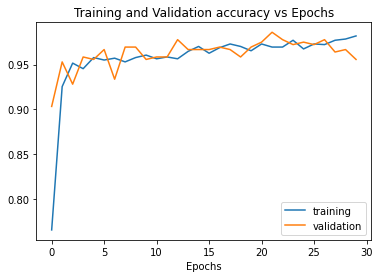

In [16]:
# plot training and validation accuracy vs epochs
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Training and Validation accuracy vs Epochs')
plt.xlabel('Epochs')

In [18]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy*100}%, Test loss: {test_loss*100}%")

16/16 [==============================] - 12s 731ms/step - loss: 0.0824 - accuracy: 0.9690
Test accuracy: 96.90082669258118%, Test loss: 8.23667123913765%


In [25]:
# predicting on new data
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for filename in uploaded.keys():
  image_path = '/content/' + filename # saving test pictures in the google colab env
  img = image.load_img(image_path, target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis=0)
  prediction = model.predict(images)
  print(filename)

  if prediction == 0:
    print('Positive to covid')
  else:
    print('Negative to covid')

Saving covid1.jpg to covid1.jpg
Saving covid2.jpeg to covid2.jpeg
Saving normal1.jpg to normal1.jpg
Saving normal2.jpg to normal2.jpg
covid1.jpg
Positive to covid
covid2.jpeg
Positive to covid
normal1.jpg
Negative to covid
normal2.jpg
Negative to covid
